By Ramya Neelakantan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pr
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 1. Load the dataset and perform following pre-processing tasks: [4 pts]
#       1.1 Remove the first column of ‘Unnamed: 0’
#       1.2 Detect missing values, and replace them with the mean.
#       1.3 Draw box-plots for each attribute to detect if there are any outliers. If there are outliers, ignore them for now.
#       1.4 Normalize all attributes within the range of 0 to 1.
data = pd.read_csv('popularity.csv')
pop_df = pd.DataFrame(data)
pop_df.head()

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7


In [3]:
# 1.1
pop_df.drop(columns = ['Unnamed: 0'], inplace = True)
pop_df.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7


In [4]:
# 1.2
pop_df.isnull().sum()
# 1 NULL value in avg_shares
# 4 NULL values in avg_comments

avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [5]:
pop_df['avg_shares'] = pop_df['avg_shares'].fillna(pop_df['avg_shares'].mean())
pop_df['avg_comments'] = pop_df['avg_comments'].fillna(pop_df['avg_comments'].mean())
pop_df.isnull().sum()
# No NULL values now

avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

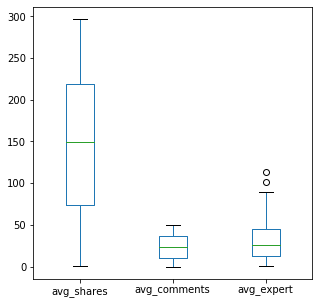

In [6]:
# 1.3
# Attributes : avg_shares, avg_comments, avg_expert
boxplot = pop_df.boxplot(column = ['avg_shares', 'avg_comments', 'avg_expert'], grid = False, figsize = (5,5))
plt.show()
# There are 2 outliers in avg_expert column

In [7]:
# 1.4
# Attributes to be normalized: avg_shares, avg_comments, avg_expert, popularity score
pr.normalize(pop_df, copy = False)
pop_df.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.974525,0.158121,0.126364,0.096592
1,0.645597,0.033860,0.744919,0.164785
2,0.376136,0.790096,0.453885,0.168105
3,0.989807,0.051487,0.085111,0.101923
4,0.993117,0.093697,0.006089,0.070019


---------------------------------------------------------------------------------------------------------------------

In [8]:
# 2. Load the dataset perform following pre-processing tasks: [2 pts]
#       1.1 Detect missing values in the age column, and replace them with the mean.
#       1.2 Encode each variable in columns-sex and embarked to integers.
#       1.3 Drop the columns which are not required and in the last cell print the first 5 rows of the data 
#           after performing all mentioned tasks on it.

# Dataset : titanic.csv
titanic_data = pd.read_csv('titanic.csv')
titanic_df = pd.DataFrame(titanic_data)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 2.1 
titanic_df.isnull().sum()
# 177 missing values in Age column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df.isnull().sum()
# No missing values in Age Column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# 2.1
# Encoding Sex to numeric values
titanic_df = titanic_df[~titanic_df['Embarked'].isnull()]

cols = ['Sex', 'Embarked']
OH_encoder = OneHotEncoder(sparse = False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(titanic_df[cols]))

OH_cols.index = titanic_df.index

num_cols = titanic_df.drop(cols, axis = 1)

titanic_df = pd.concat([num_cols, OH_cols], axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,0,1,2,3,4
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0


In [12]:
# Rename Encoded columns for easy remembrance
titanic_df.rename(columns = {0: 'Female', 1: 'Male', 2 : 'C', 3 : 'Q', 4 : 'S'}, inplace = True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0


In [13]:
# 2.3
# PassengerId, Ticket and Name will not determine survival rate. Hence these columns can be deleted

dropped_cols = ['PassengerId', 'Name', 'Ticket']
titanic_df.drop(columns = dropped_cols, inplace = True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Female,Male,C,Q,S
0,0,3,22.0,1,0,7.2500,NaN,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,NaN,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,C123,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,NaN,0.0,1.0,0.0,0.0,1.0


---------------------------------------------------------------------------------------------------------------------

In [14]:
# 3. Download and print the given image and perform following on it:[2 pts]
#       3.1 Convert image to Black and white.
#       3.2 Resize image to 100*100.
#       3.3 Convert given image into a numpy array.
#       3.4 After step 3.1 and 3.2 print the new image. Print the numpy array after step 3.3.

# Dataset : 


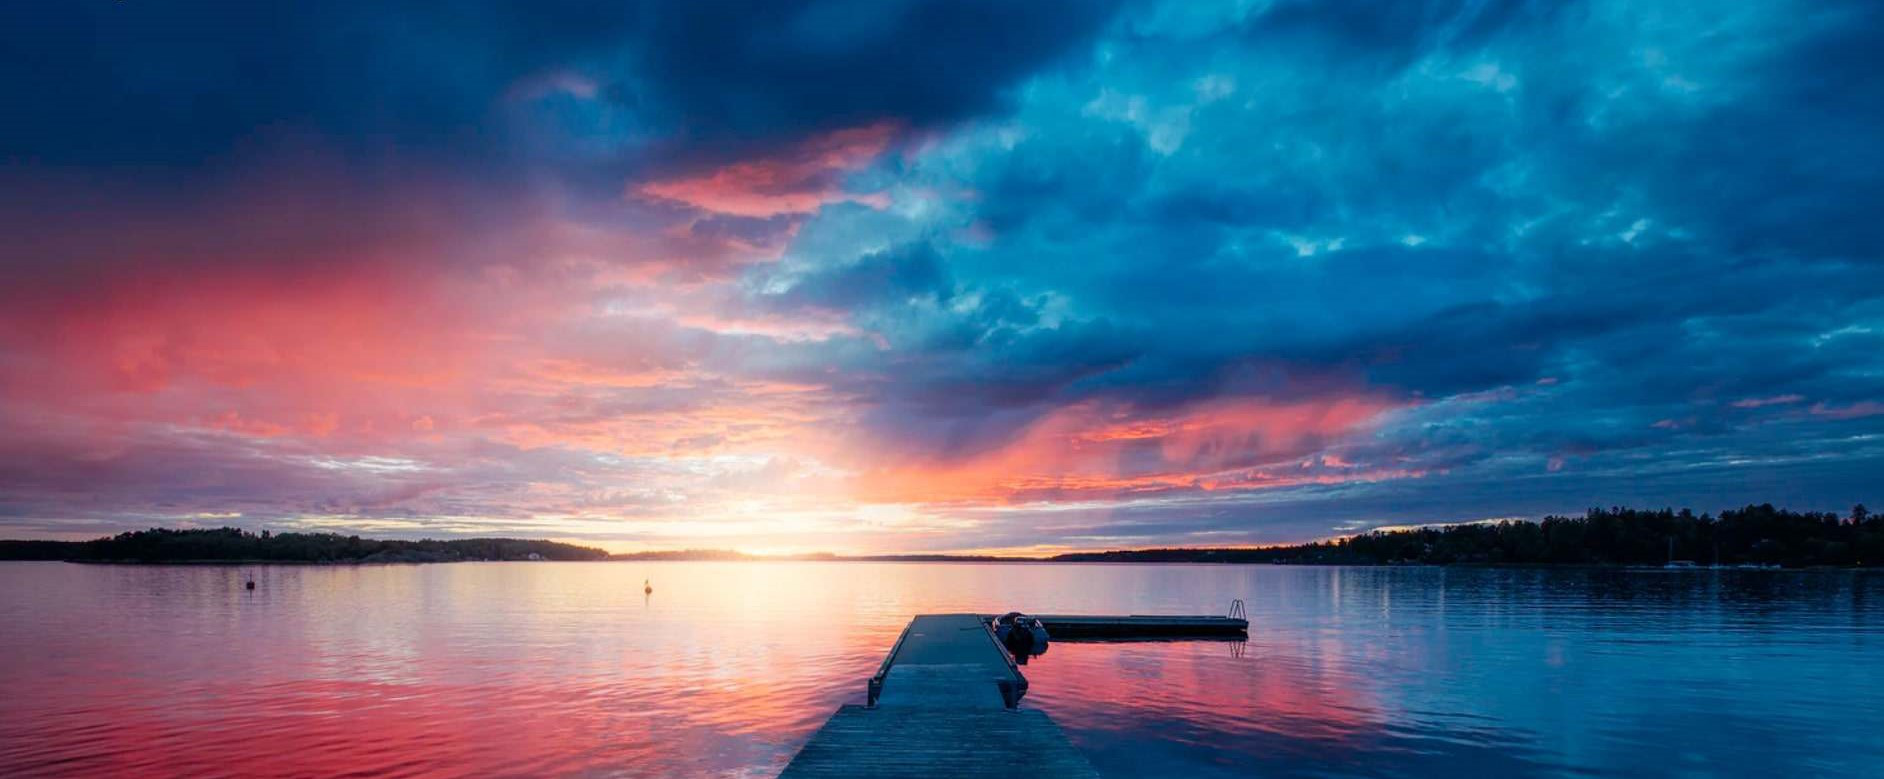

In [15]:
# 3. 
from PIL import Image
img = Image.open('image.jpg')
img

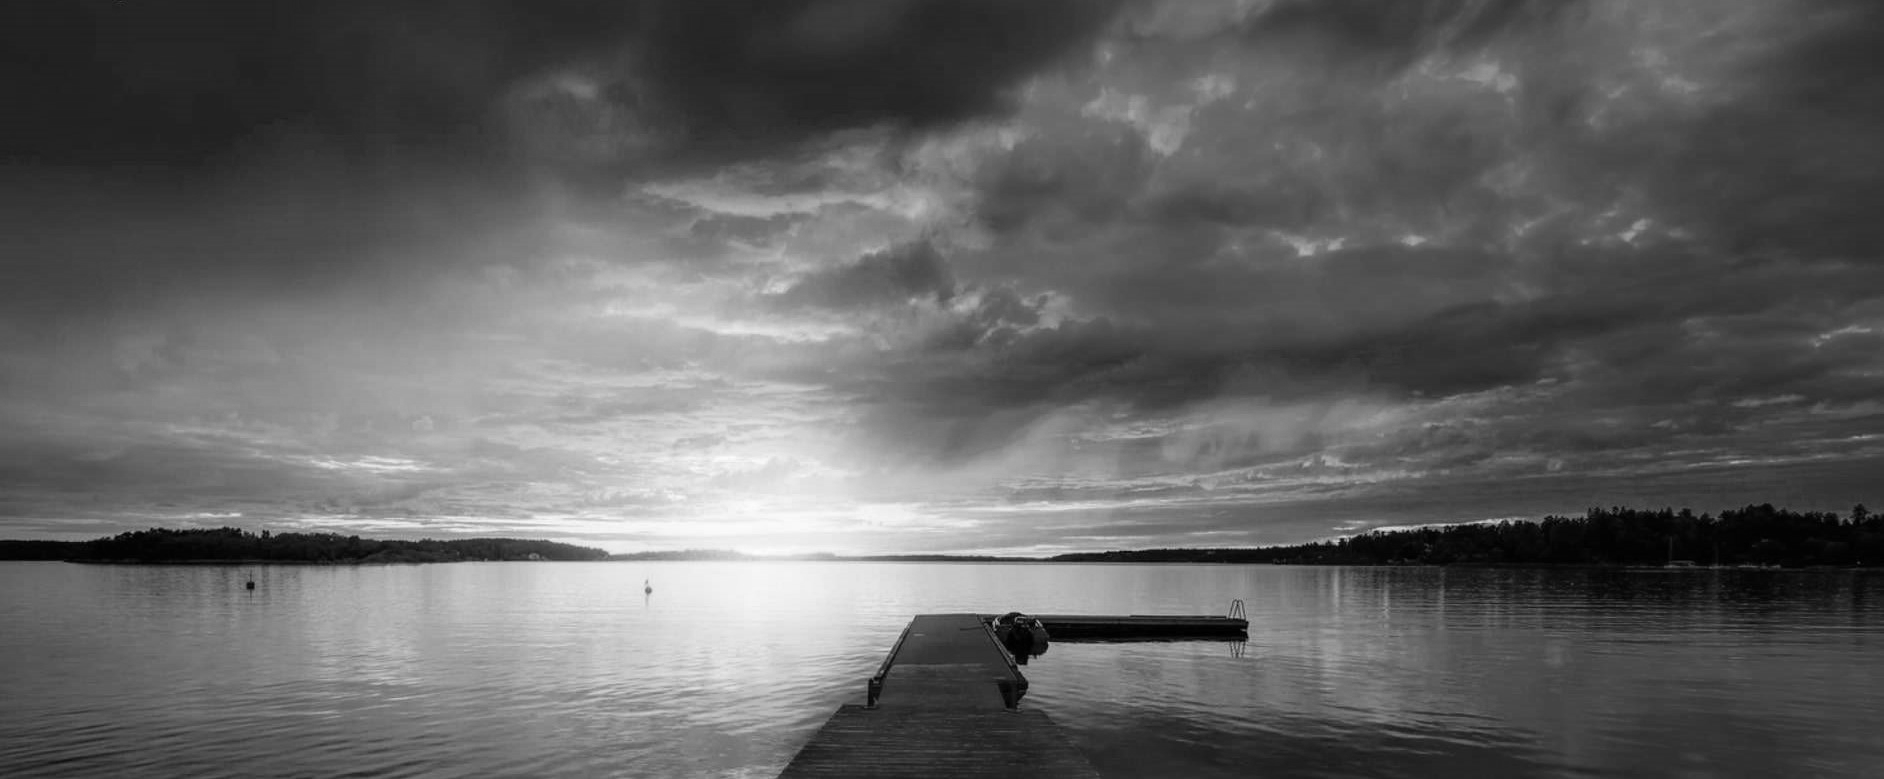

In [16]:
# 3.1
img_bw = img.convert("L")
img_bw

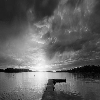

In [17]:
# 3.2
img_bw.resize((100, 100))

In [19]:
# 3.3 
img_array = np.asarray(img)
print(type(img_array))
print(img_array)

<class 'numpy.ndarray'>
[[[  0  38  87]
  [  0  38  87]
  [  0  38  87]
  ...
  [  0  65 119]
  [  0  65 119]
  [  0  65 119]]

 [[  0  38  87]
  [  0  38  87]
  [  0  38  87]
  ...
  [  0  64 120]
  [  0  64 120]
  [  0  64 120]]

 [[  0  38  87]
  [  0  38  87]
  [  0  38  87]
  ...
  [  0  64 120]
  [  0  64 120]
  [  0  64 120]]

 ...

 [[ 88  39  60]
  [ 90  41  62]
  [ 92  43  64]
  ...
  [  4  82 128]
  [  4  82 128]
  [  4  82 128]]

 [[ 94  45  66]
  [ 94  45  66]
  [ 95  46  67]
  ...
  [  3  81 127]
  [  3  81 127]
  [  3  81 127]]

 [[ 95  46  67]
  [ 95  46  67]
  [ 95  46  67]
  ...
  [  2  79 125]
  [  2  79 125]
  [  2  79 125]]]


---------------------------------------------------------------------------------------------------------------------

In [20]:
# 4. Load the dataset and perform following pre-processing tasks on ‘content’ attribute: [2 pts] 
#        4.1 Filter out Punctuation
#        4.2 Split into Words
#        4.3 Filter out stop words
#        4.4 Stem words
#            After every step of processing, print the new data. 

In [21]:
# 4.
pd.set_option('display.max_colwidth', 100)
text_data = pd.read_csv('text.csv')
text_df = pd.DataFrame(text_data)
text_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [22]:
# 4.1 
import string

def remove_punctuation(txt) : 
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [23]:
text_df['content_w/o_punctuations'] = text_df['content'].apply(lambda x: remove_punctuation(x))

text_df.head()

,tweet_id,sentiment,author,content,content_w/o_punctuations
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhhwaitin on your call
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",dannycastillo We want to trade with someone who has Houston tickets but no one will


In [24]:
# 4.2
import re

def tokenize(txt):
    tokens = re.split('\W+', txt) # W : characters that are not alphanumeric, + : More than one
    return tokens

text_df['content_tokenized'] = text_df['content_w/o_punctuations'].apply(lambda x: tokenize(x.lower()))
text_df.head()

,tweet_id,sentiment,author,content,content_w/o_punctuations,content_tokenized
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part,"[tiffanylue, i, know, i, was, listenin, to, bad, habit, earlier, and, i, started, freakin, at, h..."
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhhwaitin on your call,"[layin, n, bed, with, a, headache, ughhhhwaitin, on, your, call]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON,"[wants, to, hang, out, with, friends, soon]"
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",dannycastillo We want to trade with someone who has Houston tickets but no one will,"[dannycastillo, we, want, to, trade, with, someone, who, has, houston, tickets, but, no, one, will]"


In [25]:
# 4.3
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text_clean = [word for word in text if word not in stopwords]
    return text_clean

text_df['content_w/o_stopwords'] = text_df['content_tokenized'].apply(lambda x: remove_stopwords(x))
text_df.head()

,tweet_id,sentiment,author,content,content_w/o_punctuations,content_tokenized,content_w/o_stopwords
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part,"[tiffanylue, i, know, i, was, listenin, to, bad, habit, earlier, and, i, started, freakin, at, h...","[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part, ]"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhhwaitin on your call,"[layin, n, bed, with, a, headache, ughhhhwaitin, on, your, call]","[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]"
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",dannycastillo We want to trade with someone who has Houston tickets but no one will,"[dannycastillo, we, want, to, trade, with, someone, who, has, houston, tickets, but, no, one, will]","[dannycastillo, want, trade, someone, houston, tickets, one]"


In [26]:
# 4.4
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(tokenized_text) : 
    text = [ps.stem(word) for word in tokenized_text]
    return text

text_df['content_stemmed'] = text_df['content_w/o_stopwords'].apply(lambda x: stemming(x))
text_df.head()

,tweet_id,sentiment,author,content,content_w/o_punctuations,content_tokenized,content_w/o_stopwords,content_stemmed
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part,"[tiffanylue, i, know, i, was, listenin, to, bad, habit, earlier, and, i, started, freakin, at, h...","[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part, ]","[tiffanylu, know, listenin, bad, habit, earlier, start, freakin, part, ]"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhhwaitin on your call,"[layin, n, bed, with, a, headache, ughhhhwaitin, on, your, call]","[layin, n, bed, headache, ughhhhwaitin, call]","[layin, n, bed, headach, ughhhhwaitin, call]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]","[funeral, ceremonygloomy, friday]","[funer, ceremonygloomi, friday]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON,"[wants, to, hang, out, with, friends, soon]","[wants, hang, friends, soon]","[want, hang, friend, soon]"
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",dannycastillo We want to trade with someone who has Houston tickets but no one will,"[dannycastillo, we, want, to, trade, with, someone, who, has, houston, tickets, but, no, one, will]","[dannycastillo, want, trade, someone, houston, tickets, one]","[dannycastillo, want, trade, someon, houston, ticket, one]"
